In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

In [2]:
#Here we will read the TMA_Data and convert it into a dataframe where we name it data1.

data1 = pd.read_csv (r'C:\Users\Derence\Desktop\ANL252 PYTHON FOR DATA ANALYTICS\TMA\TMA_Data.csv') 
data1.head()

,ID,Staff,BirthYear,Age,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,36,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,36,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,37,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,6/10/1984,38,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,9/8/1989,33,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.0,4,2


In [3]:
#We can calculate the mean for both gender using groupby on data1 and round off to the nearest cent.

round(data1.groupby('Gender').Salary.mean (),2)

Gender
F     67686.53
M     71063.81
Name: Salary, dtype: float64

In [4]:
#We can calculate the median for both gender using groupby using data1.

round(data1.groupby('Gender').Salary.median (),2)

Gender
F     62449.5
M     63799.5
Name: Salary, dtype: float64

In [5]:
#After calculating the mean and median sorted by Gender, we can create the summary table.

data = {'Mean Salary (Annual)': [67686.53, 71063.81],
        'Median Salary (Annual)': [62449.5, 63799.5]
        }

df_summarytable1 = pd.DataFrame(data, index=['Female','Male'])

print (df_summarytable1)

        Mean Salary (Annual)  Median Salary (Annual)
Female              67686.53                 62449.5
Male                71063.81                 63799.5


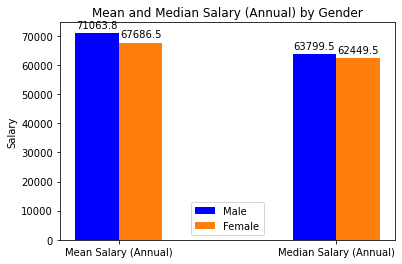

In [6]:
#Here we use matplotlib to plot the bar chart as per excel Chart 1.

labels = ['Mean Salary (Annual)', 'Median Salary (Annual)']
men_means = [71063.81, 63799.5]
women_means = [67686.53, 62449.5]

x = np.arange(len(labels))
width = 0.2

#Here we set the location of the bar as well as the color and labels.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, color = 'b', label='Male')
rects2 = ax.bar(x + width/2, women_means, width, color = 'tab:orange', label='Female')

ax.set_ylabel('Salary')
ax.set_title('Mean and Median Salary (Annual) by Gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()

In [7]:
#Here we prepare the dataframe for Chart 2 where only current employees will be analysed, thus we only wish to keep rows where LeftDate is NaN.

nan_df = data1[data1['LeftDate'].isna()]

print (nan_df)

      ID             Staff   BirthYear  Age Gender  Marital   Citizenship  \
0      1   Aairah Hastings   10/7/1986   36      F   Single       Citizen   
1      2  Aaminah Mcmillan    05/25/86   36      F  Married       Citizen   
2      3      Aamna Howell    04/20/85   37      F   Single       Citizen   
3      4     Aayan Ferrell   6/10/1984   38     M   Married       Citizen   
7      8        Adeeb Rice   6/11/1970   52     M    Single            PR   
..   ...               ...         ...  ...    ...      ...           ...   
244  245     Yousaf Wagner    08/26/80   42     M   Married  Non-Resident   
245  246     Zaina Parrish  10/11/1981   41      F  Married  Non-Resident   
246  247       Zane Downes    10/24/87   35     M   Married  Non-Resident   
247  248       Zayd Farley    7/9/1970   52     M    Single  Non-Resident   
249  250    Zuzanna Pruitt    05/21/87   35      F   Single  Non-Resident   

    Minority   JoinDate LeftDate           Unit  Salary PerformanceScore  \

In [8]:
#Here we only specifically select the column 'Salary'. This is the summary table for Chart 2.

Salary_nan_df = nan_df.Salary

print (Salary_nan_df)

0       46335
1       66825
2       60446
3       93046
7       66808
        ...  
244     50373
245     89883
246     90100
247    138888
249     55315
Name: Salary, Length: 165, dtype: int64


(array([ 14., 112.,  26.,   6.,   2.,   2.,   2.,   0.]),
 array([ 25000,  50000,  75000, 100000, 125000, 150000, 175000, 200000,
        225000]),
 <BarContainer object of 8 artists>)

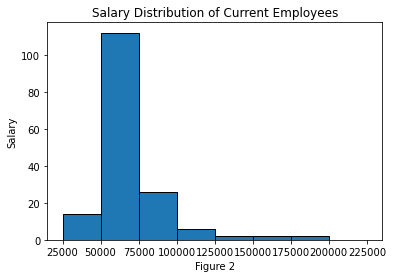

In [9]:
#Here we plot the histogram (Chart 2)

Salary = (Salary_nan_df)
bins = (25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000)

plt.title('Salary Distribution of Current Employees')
plt.xlabel('Figure 2')
plt.ylabel('Salary')

plt.hist(Salary, bins=bins, edgecolor='black')

In [10]:
#Here we apply 3 functions to produce a summary table for question 1c. We specify the column we required which are 'Staff', 'JoinDate' and 'LeftDate'.
#After which we replace all NaN (Blank) data to 1/5/2022 and convert it to string where we can display the whole dataframe to view the length of service of each staff.

Duration_Main_df = data1[['Staff','JoinDate','LeftDate']]
Clean_df = Duration_Main_df.fillna('1/5/2022')
print(Clean_df)

                Staff   JoinDate  LeftDate
0     Aairah Hastings   4/2/2012  1/5/2022
1    Aaminah Mcmillan  5/12/2014  1/5/2022
2        Aamna Howell  9/29/2014  1/5/2022
3       Aayan Ferrell   1/5/2016  1/5/2022
4          Ace Potter  7/11/2011  9/6/2020
..                ...        ...       ...
245     Zaina Parrish  2/16/2015  1/5/2022
246       Zane Downes  4/20/2017  1/5/2022
247       Zayd Farley   1/5/2014  1/5/2022
248       Zoya Easton  8/13/2012  9/1/2015
249    Zuzanna Pruitt  3/30/2015  1/5/2022

[250 rows x 3 columns]


In [11]:
#Here we convert the date into datetime format
Clean_df[['JoinDate','LeftDate']] = Clean_df[['JoinDate','LeftDate']].apply(pd.to_datetime) 

#Here we create an additional column call "Length of Service" and calculate the number of days between each date (LeftDate - JoinDate).
Clean_df['Length of Service'] = (Clean_df['LeftDate'] - Clean_df['JoinDate']).dt.days 

In [12]:
#Here we set the dataframe option to view every rows and columns to view the length of Service of each staff (In days). We will convert to years later on.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(Clean_df)

                    Staff   JoinDate   LeftDate  Length of Service
0         Aairah Hastings 2012-04-02 2022-01-05               3565
1        Aaminah Mcmillan 2014-05-12 2022-01-05               2795
2            Aamna Howell 2014-09-29 2022-01-05               2655
3           Aayan Ferrell 2016-01-05 2022-01-05               2192
4              Ace Potter 2011-07-11 2020-09-06               3345
5          Adaline Deacon 2011-01-10 2012-05-14                490
6           Addie Terrell 2011-07-05 2016-09-05               1889
7              Adeeb Rice 2012-05-14 2022-01-05               3523
8           Aleena Sierra 2011-06-10 2022-01-05               3862
9            Alena Galvan 2014-11-10 2022-01-05               2613
10          Alfie Hibbert 2012-08-13 2022-01-05               3432
11          Allison Byers 2011-05-16 2018-06-04               2576
12          Amarah Morris 2015-02-16 2022-01-05               2515
13           Amy Jennings 2009-07-06 2022-01-05               

In [13]:
#Here we divide the column "Length of Service" by 365 to calculate the "Length of Service" expressed in years.
Clean_df['Length of Service'] = Clean_df['Length of Service'].div(365)

print(Clean_df)

                    Staff   JoinDate   LeftDate  Length of Service
0         Aairah Hastings 2012-04-02 2022-01-05           9.767123
1        Aaminah Mcmillan 2014-05-12 2022-01-05           7.657534
2            Aamna Howell 2014-09-29 2022-01-05           7.273973
3           Aayan Ferrell 2016-01-05 2022-01-05           6.005479
4              Ace Potter 2011-07-11 2020-09-06           9.164384
5          Adaline Deacon 2011-01-10 2012-05-14           1.342466
6           Addie Terrell 2011-07-05 2016-09-05           5.175342
7              Adeeb Rice 2012-05-14 2022-01-05           9.652055
8           Aleena Sierra 2011-06-10 2022-01-05          10.580822
9            Alena Galvan 2014-11-10 2022-01-05           7.158904
10          Alfie Hibbert 2012-08-13 2022-01-05           9.402740
11          Allison Byers 2011-05-16 2018-06-04           7.057534
12          Amarah Morris 2015-02-16 2022-01-05           6.890411
13           Amy Jennings 2009-07-06 2022-01-05          12.50

In [14]:
# Here we set decimals as 1 decimal point.
# We can use the loc and describe function to generate the statistics of a specific column where in this case we use the loc[4:].
# loc[4:] output the 5th column since python column start counting from 0 and thus loc[4:] will choose the 5th column which is the "Length of Service".
decimals = 1   
LoS_Clean_df = Clean_df.loc[4:].describe().apply(lambda x: round(x, decimals))

print (LoS_Clean_df)

       Length of Service
count              246.0
mean                 6.6
std                  3.1
min                  0.1
25%                  4.6
50%                  7.0
75%                  8.5
max                 16.0


In [15]:
#As such, the average (mean) length of service is 6.6 years and the minimum and maximum length of service is 0.1 years and 16.0 years respectively.

In [ ]:
#Here we convert the "Staff' column of Clean_df to a list.

list = Clean_df['Staff'].to_list()

#After which we use while True to loop the input () function. We need to apply the if and else function to search whether the name entered is within the list..
while True:
    employee_name = input("Enter your full name here (Type q to quit)")
    
    if employee_name == 'q':
        print("You have quit the query")
        break
    if employee_name in list:
        print("%s is a staff" %(employee_name))
    else:
        print("%s is not a staff" %(employee_name))

In [ ]:
#As the question 1d is rather complex, I wish to explain my rational behind my codes. 
#The question specifically asked "query if a particular person was/is a staff of the organization" thus we will need to use the full list of employees including those that left. In this case, the dataframe will be Clean_df and not nan_df.
#After which the question mentioned the query should prompt user to make another query until otherwise, as such we will need to loop the input using while True.
#The next part of the code is using the if function else function where the code goes in order, checking if the input is q first, followed by if the input is a staff or not a staff.
#The "q" check need to be done first;If the check for "q" is either 2nd or 3rd in place, the input will prompt that "q" is not a staff which is not what we want.
#What we want is q to quit the query instantly without checking the input in Clean_df.
#In this case, the order of if and else check is important.